# **Alura Store**

## Importación de datos



In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


## **1. Análisis de facturación**



Ingreso total de cada tienda

In [4]:
nom_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

In [5]:
tiendas = [tienda1, tienda2, tienda3, tienda4]
ventas_totales = []
for i, tienda in enumerate(tiendas):
  ventas = sum(list(tienda['Precio']))
  ventas_totales.append(ventas)
  print(f"Facturación Tienda {i+1}: ${ventas}")

Facturación Tienda 1: $1150880400.0
Facturación Tienda 2: $1116343500.0
Facturación Tienda 3: $1098019600.0
Facturación Tienda 4: $1038375700.0


La tienda con mayor facturación es la 1, mientras que la tienda con menor facturación es la 4.

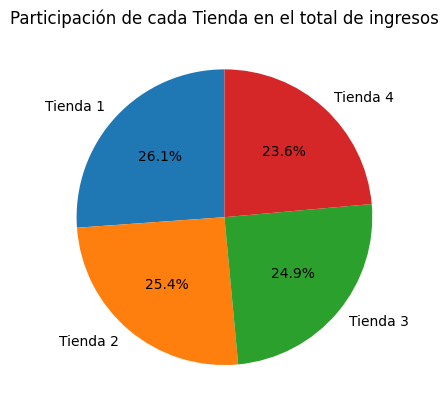

In [6]:
fig, ax = plt.subplots()
ax.pie(ventas_totales, labels=nom_tiendas, autopct='%1.1f%%', startangle=90)
ax.set_title('Participación de cada Tienda en el total de ingresos')

plt.show()

## **2. Ventas por categoría**

In [7]:
for i, tienda in enumerate(tiendas):
  # Creamos un diccionario con las categorias y las ventas de esa categoria ordenadas de forma ascendente
  ventas_categoria = dict(tienda.groupby('Categoría del Producto')['Categoría del Producto'].value_counts().sort_values(ascending=False))
  print(f'\nVentas por categoría en la tienda {i+1}')
  # Se imprime la categoria con la cantidad de ventas
  for categoria, ventas in ventas_categoria.items():
    print(f"\t{categoria}: {ventas}")


Ventas por categoría en la tienda 1
	Muebles: 465
	Electrónicos: 448
	Juguetes: 324
	Electrodomésticos: 312
	Deportes y diversión: 284
	Instrumentos musicales: 182
	Libros: 173
	Artículos para el hogar: 171

Ventas por categoría en la tienda 2
	Muebles: 442
	Electrónicos: 422
	Juguetes: 313
	Electrodomésticos: 305
	Deportes y diversión: 275
	Instrumentos musicales: 224
	Libros: 197
	Artículos para el hogar: 181

Ventas por categoría en la tienda 3
	Muebles: 499
	Electrónicos: 451
	Juguetes: 315
	Electrodomésticos: 278
	Deportes y diversión: 277
	Libros: 185
	Artículos para el hogar: 177
	Instrumentos musicales: 177

Ventas por categoría en la tienda 4
	Muebles: 480
	Electrónicos: 451
	Juguetes: 338
	Deportes y diversión: 277
	Electrodomésticos: 254
	Artículos para el hogar: 201
	Libros: 187
	Instrumentos musicales: 170


 En las 4 tiendas, las 3 categrías con más ventas fueron *Muebles*, *Electrónicos* y *Jueguetes*

In [8]:
categorias = list(tienda1['Categoría del Producto'].unique())

In [9]:
ganancia_categoria_dict = {}
for i, categoria in enumerate(categorias):
  ganancia_categoria_dict[categoria] = []

In [10]:
for i, tienda in enumerate(tiendas):
  ganancias_categoria = dict(tienda.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False))
  print(f'\nGanancias por categoría en la tienda {i+1}')
  # Se imprime la categoria con la cantidad de ventas
  for categoria, ventas in ganancias_categoria.items():
    ganancia_categoria_dict[categoria].append(float(ventas))
    print(f"\t{categoria}: ${ventas}")


Ganancias por categoría en la tienda 1
	Electrónicos: $429493500.0
	Electrodomésticos: $363685200.0
	Muebles: $187633700.0
	Instrumentos musicales: $91299000.0
	Deportes y diversión: $39290000.0
	Juguetes: $17995700.0
	Artículos para el hogar: $12698400.0
	Libros: $8784900.0

Ganancias por categoría en la tienda 2
	Electrónicos: $410831100.0
	Electrodomésticos: $348567800.0
	Muebles: $176426300.0
	Instrumentos musicales: $104990300.0
	Deportes y diversión: $34744500.0
	Juguetes: $15945400.0
	Artículos para el hogar: $14746900.0
	Libros: $10091200.0

Ganancias por categoría en la tienda 3
	Electrónicos: $410775800.0
	Electrodomésticos: $329237900.0
	Muebles: $201072100.0
	Instrumentos musicales: $77380900.0
	Deportes y diversión: $35593100.0
	Juguetes: $19401100.0
	Artículos para el hogar: $15060000.0
	Libros: $9498700.0

Ganancias por categoría en la tienda 4
	Electrónicos: $409476100.0
	Electrodomésticos: $283260200.0
	Muebles: $192528900.0
	Instrumentos musicales: $75102400.0
	Depor

In [11]:
ganancia_categoria_dict

{'Electrónicos': [429493500.0, 410831100.0, 410775800.0, 409476100.0],
 'Muebles': [187633700.0, 176426300.0, 201072100.0, 192528900.0],
 'Juguetes': [17995700.0, 15945400.0, 19401100.0, 20262200.0],
 'Electrodomésticos': [363685200.0, 348567800.0, 329237900.0, 283260200.0],
 'Artículos para el hogar': [12698400.0, 14746900.0, 15060000.0, 15074500.0],
 'Deportes y diversión': [39290000.0, 34744500.0, 35593100.0, 33350100.0],
 'Libros': [8784900.0, 10091200.0, 9498700.0, 9321300.0],
 'Instrumentos musicales': [91299000.0, 104990300.0, 77380900.0, 75102400.0]}

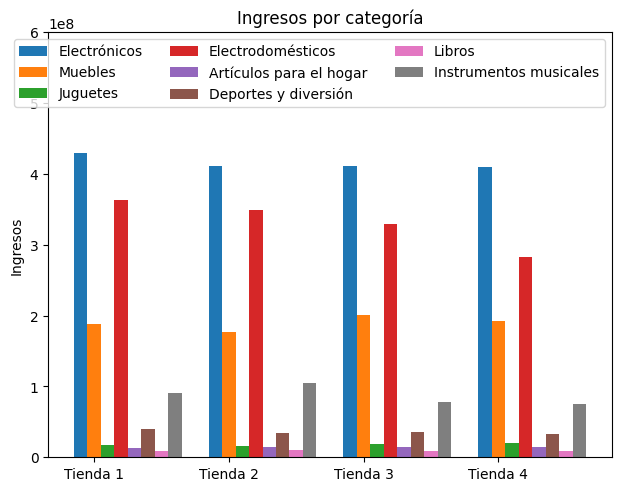

In [17]:
x = np.arange(len(nom_tiendas))
width = 0.10
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for categoria, ganancia in ganancia_categoria_dict.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, ganancia, width)
   # ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylim(0,600000000)
ax.set_ylabel('Ingresos')
ax.set_title('Ingresos por categoría')
ax.set_xticks(x + width, nom_tiendas)
ax.legend(categorias,loc='upper right', ncols=3)

plt.show()

## **3. Calificación promedio de la tienda**


In [ ]:
calificaciones = []
for i, tienda in enumerate(tiendas):
  valoraciones = tienda['Calificación'].mean()
  calificaciones.append(valoraciones)
  print(f"Calificación promedio de la tienda {i+1}: {valoraciones}")

Calificación promedio de la tienda 1: 3.976685036032217
Calificación promedio de la tienda 2: 4.037303942348453
Calificación promedio de la tienda 3: 4.048325561678677
Calificación promedio de la tienda 4: 3.9957591178965224


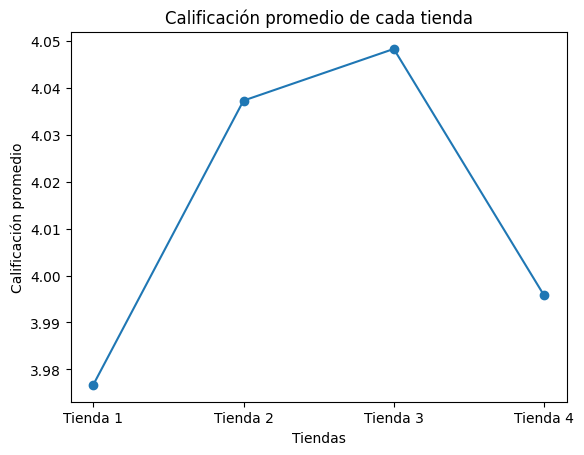

In [ ]:
ig, ax = plt.subplots()
ax.plot(nom_tiendas, calificaciones, marker='o')
ax.set_xlabel('Tiendas')
ax.set_ylabel('Calificación promedio')
ax.set_title('Calificación promedio de cada tienda')

plt.show()

## **4. Productos más y menos vendidos**

In [ ]:
for i, tienda in enumerate(tiendas):
  print(f'\nProductos más vedidos de la tienda {i+1}')
  productos_mas_vendidos = dict(tienda.groupby('Producto')['Producto'].value_counts().sort_values(ascending=False).head())
  for producto, ventas in productos_mas_vendidos.items():
    print(f"\t{producto}: {ventas}")

  print(f'Productos menos vedidos de la tienda {i+1}')
  productos_menos_vendidos = dict(tienda.groupby('Producto')['Producto'].value_counts().sort_values(ascending=False).tail())
  for producto, ventas in productos_menos_vendidos.items():
    print(f"\t{producto}: {ventas}")


Productos más vedidos de la tienda 1
	Armario: 60
	TV LED UHD 4K: 60
	Microondas: 60
	Secadora de ropa: 58
	Mesa de noche: 56
Productos menos vedidos de la tienda 1
	Mochila: 39
	Pandereta: 36
	Olla de presión: 35
	Celular ABXY: 33
	Auriculares con micrófono: 33

Productos más vedidos de la tienda 2
	Iniciando en programación: 65
	Microondas: 62
	Batería: 61
	Pandereta: 58
	Guitarra acústica: 58
Productos menos vedidos de la tienda 2
	Auriculares: 37
	Sillón: 35
	Impresora: 34
	Mesa de comedor: 34
	Juego de mesa: 32

Productos más vedidos de la tienda 3
	Kit de bancas: 57
	Mesa de comedor: 56
	Cama king: 56
	Set de ollas: 55
	Mesa de noche: 55
Productos menos vedidos de la tienda 3
	Guitarra eléctrica: 38
	Mochila: 36
	Microondas: 36
	Set de vasos: 36
	Bloques de construcción: 35

Productos más vedidos de la tienda 4
	Cama box: 62
	Cubertería: 59
	Cama king: 56
	Dashboards con Power BI: 56
	Carrito de control remoto: 55
Productos menos vedidos de la tienda 4
	Ciencia de datos con Pyth

In [ ]:
# Productos que más y menos ingresos generaron
for i, tienda in enumerate(tiendas):
  productos_mayor_ingreso = dict(tienda.groupby('Producto')['Precio'].sum().sort_values(ascending=False).head())
  print(f'\nProductos que generaron más ingresos en la tienda {i+1}')
  # Se imprime el producto con la cantidad de ingresos
  for producto, ventas in productos_mayor_ingreso.items():
    print(f"\t{producto}: ${ventas}")

  print(f'Productos que generaron menos ingresos en la tienda {i+1}')
  productos_menos_vendidos = dict(tienda.groupby('Producto')['Precio'].sum().sort_values(ascending=False).tail())
  for producto, ventas in productos_menos_vendidos.items():
    print(f"\t{producto}: ${ventas}")


Productos que generaron más ingresos en la tienda 1
	TV LED UHD 4K: $142150200.0
	Refrigerador: $112143300.0
	Iphone 15: $97902200.0
	Smart TV: $67452100.0
	Lavadora de ropa: $65783600.0
Productos que generaron menos ingresos en la tienda 1
	Ajedrez de madera: $1430600.0
	Set de vasos: $1359100.0
	Cubo mágico 8x8: $696900.0
	Dinosaurio Rex: $688900.0
	Cuerda para saltar: $652800.0

Productos que generaron más ingresos en la tienda 2
	Iphone 15: $113225800.0
	TV LED UHD 4K: $103375000.0
	Refrigerador: $97632500.0
	Lavadora de ropa: $66762300.0
	Smart TV: $61142000.0
Productos que generaron menos ingresos en la tienda 2
	Set de vasos: $1542600.0
	Ajedrez de madera: $1287700.0
	Cuerda para saltar: $856900.0
	Dinosaurio Rex: $770300.0
	Cubo mágico 8x8: $643600.0

Productos que generaron más ingresos en la tienda 3
	Refrigerador: $99889700.0
	TV LED UHD 4K: $96669100.0
	Iphone 15: $93225700.0
	Smart TV: $78837300.0
	Lavavajillas: $64364800.0
Productos que generaron menos ingresos en la tie

## **5. Envío promedio por tienda**

In [ ]:
for i, tienda in enumerate(tiendas):
  envios = tienda['Costo de envío'].mean()
  print(f"Costo de envío promedio de la tienda {i+1}: ${envios}")

Costo de envío promedio de la tienda 1: $26018.60958033065
Costo de envío promedio de la tienda 2: $25216.235693090293
Costo de envío promedio de la tienda 3: $24805.680373039424
Costo de envío promedio de la tienda 4: $23459.457167090754


# Informe

En el análisis de facturación se encontró que la tienda que *más* aportó a los ingresos de la empresa fue la **tienda 1**. Por otro lado, la tienda que *menos* ingresos aportó fue la **tienda 4**

Las categorías con más productos vendidos fueron las mismas en cada tienda, siendo estas: *Muebles*, *Electrónicos* y *Juguetes*, en este orden. La tienda qu más productos vendió de las categorías Muebles y Electrónicos fue la **tienda 3**. A su vez, la **tienda 4** fue la que vendió más productos de la categoría Juguetes.


Sin embargo, las categorías que más ingresos aportaron fueron: Electrónicos, Electrodómestidos y Muebles. La **tienda 1** fue la tienda que mayor cantidad de ingresos aportó en las primeras dos categorías mencionadas, mientras que la **tienda 3** aportó más ingresos en Muebles.

A pesar de que la tienda 4 vendió más productos de la categoría muebles, no fue la tienda que más ingresos aportó en dicha categoría.



A través del análisis de las calificaciones recibidas de los clientes de cada tienda, se obtuvo la calificación promedio de cada tienda con el siguiente orden, yendo de mayor a menor:

1.   Tienda 3
2.   Tienda 2
3.   Tienda 4
4.   Tienda 1



Entre los productos vendidos que más ingresos aportaron a la empresa, se encontraron Iphone 15, TV LED UHD 4K, Smart TV y Refrigerador en todas las tiendas, aunque no fueros los productos que más cantidad se vendieron. Sin embargo, uno de los productos que más cantidad vendió la tienda 1 es TV LED UHD 4K, lo cual refuerza el hecho que esta tienda vende más productos que aportan más ingresos.

Sobre el costo de envío promedio por tienda, se obtuvo que la tienda con mayor costo de envío promedio  es la tienda 1. Lo cual puede indicar que hay cierta preferencia hacia esta tienda de parte de los clientes a pesar de la distancia. Siendo que la tienda con peor calificación promedio de parte de los clientes es la tienda 1, también es la tienda cuya facturación total es la mayor entre las demás tiendas. A pesar de no ser la tienda que más productos vende en las categorías más populares, los productos vendidos aportan mayores ingresos. Por lo tanto, cerrar esta tienda significaría una disminución considerable en los ingresos de la empresa.

Por otro lado, la tienda 4 es la segunda tienda con peor calificación promedio, sumando que es la tienda que menor facturación total tiene. Aun cuando es la tienda que más productos vende en 2 de las categorías más populares, no son las que más ingresos aportan. Por estas razones, la tienda que se propone cerrar es la **tienda 4**.